In [1]:
import numpy as np
import torchvision
from torchvision.transforms import v2
import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
import skimage.color
from torch.nn.functional import relu, tanh, sigmoid
from PIL import Image

/cs/cs152/venv/lib/python3.11/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/cs/cs152/venv/lib/python3.11/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue:

In [2]:
class RGB2LAB(torch.nn.Module):
    def forward(self, img):  # we assume inputs are always structured like this
        # print(img.shape)
        lab_image = skimage.color.rgb2lab(img)
        # Do some transformations. Here, we're just passing though the input
        return lab_image

class LAB2RGB(torch.nn.Module):
    def forward(self, img):  # we assume inputs are always structured like this
        rgb_image = skimage.color.lab2rgb(img)
        # Do some transformations. Here, we're just passing though the input
        return rgb_image

def split_norm(lab_img):
    # return lab_img[:][0]/50 - 1, lab_img[:][1, 2]/120
    # return torch.select(lab_img, 1, 0)
    
    return torch.unsqueeze(lab_img[:, 0, :, :]/50 - 1, 1), lab_img[:, (1,2), :, :]/100

def merge_denorm(l, ab):
    # return lab_img[:][0]/50 - 1, lab_img[:][1, 2]/120
    # return torch.select(lab_img, 1, 0)
    l = (l + 1)*50
    ab = ab*100
    return torch.cat((l, ab), 1)


def split_norm2(lab_img):
    # return lab_img[:][0]/50 - 1, lab_img[:][1, 2]/120
    # return torch.select(lab_img, 1, 0)
    
    return torch.unsqueeze(lab_img[:, 0, :, :]/50 - 1, 1), (((lab_img[:, (1,2), :, :]/100) + 1) * 10).int()
        
        


def merge_denorm2(l, ab):
    # return lab_img[:][0]/50 - 1, lab_img[:][1, 2]/120
    # return torch.select(lab_img, 1, 0)
    l = (l + 1)*50
    ab = ((ab/10)-1) * 100
    return torch.cat((l, ab), 1)



def lab_to_norm(lab_img):
    l = lab_img[:, 0, :, :]
    ab = lab_img[:, (1,2), :, :]
    l =  torch.unsqueeze(l/100, 1)
    ab = (ab+128)/255
    return torch.cat((l, ab), 1)
    


rgb_transforms = v2.Compose([
    # v2.ToPILImage(),
    LAB2RGB(),
    v2.ToImageTensor(),
])


transform = v2.Compose(
    [

     
     v2.Resize((80, 80)), v2.ToTensor()],
     
    )


transform_grey = v2.Compose(
    [

     # v2.ToPILImage(),
     v2.Grayscale(),
     # v2.ToTensor()
    ],
    )


transform2 = v2.Compose(
    [
     RGB2LAB(),
     v2.ToTensor(),
     v2.ToDtype(torch.float32),
     
     v2.Resize((80, 80))],
    )

transform3 = v2.Compose(
    [
     RGB2LAB(),
     v2.ToTensor(),
     v2.ToDtype(torch.float32),
     
     v2.Resize((160, 160))],
    )

transform4 = v2.Compose(
    [
     
     v2.Resize((80, 80))],
    )




# training_set = torchvision.datasets.LFWPeople('/cs/cs152/individual/treddy/celeb', split='train', transform=transform, download=True)
validation_set = torchvision.datasets.LFWPeople('/cs/cs152/individual/treddy/celeb2', split='test', transform=transform, download=True)
validation_set2 = torchvision.datasets.LFWPeople('/cs/cs152/individual/treddy/celeb2', split='test', transform=transform2, download=True)
validation_set3 = torchvision.datasets.LFWPeople('/cs/cs152/individual/treddy/celeb2', split='test', transform=transform3, download=True)

# training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=1, shuffle=False)
validation_loader2 = torch.utils.data.DataLoader(validation_set2, batch_size=1, shuffle=False)
validation_loader3 = torch.utils.data.DataLoader(validation_set2, batch_size=1, shuffle=False)

/cs/cs152/venv/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [3]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        print('1c')
        plt.imshow(npimg, cmap="Greys")
    else:
        # print('a')
        plt.imshow(np.transpose(npimg, (1, 2, 0)))


def matplotlib_imsave(img, model_type, img_index, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        print('1c')
        plt.imshow(npimg, cmap="Greys")
    else:
        # print('a')
        # im = Image.fromarray(np.transpose(npimg, (1, 2, 0)))
        # im = 
        # im.save("your_file.jpeg")
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.axis('off')
        name = 'outputs/' + img_index +'_'+ model_type 
        plt.savefig(name, bbox_inches='tight')

In [4]:
dataiter = iter(validation_loader)
dataiter2 = iter(validation_loader2)
dataiter3 = iter(validation_loader3)
rgb_images, labels = next(dataiter)
grey_images = transform_grey(rgb_images)
    
    
images, labels = next(dataiter2)
l, _ = split_norm(images)
l2, _ = split_norm2(images)
    
    
    
images, labels = next(dataiter3)
l3, _ = split_norm2(images)
    
    
loss_fn = torch.nn.L1Loss()
loss_fn1 = torch.nn.MSELoss()
loss_fn2 = torch.nn.CrossEntropyLoss()


/cs/cs152/venv/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [5]:



# NOTE: This UNet was more or less copied from 
# https://towardsdatascience.com/cook-your-first-u-net-in-pytorch-b3297a844cf3
class UNet(nn.Module):
  def __init__(self):
    super().__init__()

    # input is a 64x64x1
    self.e11 = nn.Conv2d(1, 64, kernel_size=3, padding=1)  # out = 64x64x64
    self.e12 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # out = 32x32x64

    self.e21 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # output = 32x32x128
    self.e22 = nn.Conv2d(128, 128, kernel_size=3, padding=1) # output: 32x32x128
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # output= 16x16x128

    self.e31 = nn.Conv2d(128, 256, kernel_size=3, padding=1) # output= 16x16x256
    self.e32 = nn.Conv2d(256, 256, kernel_size=3, padding=1) #
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 8x8x256

    self.e41 = nn.Conv2d(256, 512, kernel_size=3, padding=1) # output 8x8x512
    self.e42 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
    self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2) #4x4x512

    self.e51 = nn.Conv2d(512, 1024, kernel_size=3, padding=1) # output: 30x30x1024
    self.e52 = nn.Conv2d(1024, 1024, kernel_size=3, padding=1) # output: 28x28x1024


    self.upconv1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
    self.d11 = nn.Conv2d(1024, 512, kernel_size=3, padding=1)
    self.d12 = nn.Conv2d(512, 512, kernel_size=3, padding=1)

    self.upconv2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
    self.d21 = nn.Conv2d(512, 256, kernel_size=3, padding=1)
    self.d22 = nn.Conv2d(256, 256, kernel_size=3, padding=1)

    self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
    self.d31 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
    self.d32 = nn.Conv2d(128, 128, kernel_size=3, padding=1)

    self.upconv4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
    self.d41 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
    self.d42 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

    self.outconv = nn.Conv2d(64, 3, kernel_size=1)


  def forward(self, x):
    out_e11 = relu(self.e11(x))
    out_e12 = relu(self.e12(out_e11))
    out_ep1 = self.pool1(out_e12)

    out_e21 = relu(self.e21(out_ep1))
    out_e22 = relu(self.e22(out_e21))
    out_p2 = self.pool2(out_e22)

    out_e31 = relu(self.e31(out_p2))
    out_e32 = relu(self.e32(out_e31))
    out_p3 = self.pool3(out_e32)

    out_e41 = relu(self.e41(out_p3))
    out_e42 = relu(self.e42(out_e41))
    out_p4 = self.pool3(out_e42)

    out_e51 = relu(self.e51(out_p4))
    out_e52 = relu(self.e52(out_e51))


        # Decoder
    out_u1 = self.upconv1(out_e52)
    # print(out_u1.shape)
    # print(out_e42.shape)
    out_u11 = torch.cat([out_u1, out_e42], dim=1)
    out_d11 = relu(self.d11(out_u11))
    out_d12 = relu(self.d12(out_d11))

    out_u2 = self.upconv2(out_d12)
    out_u22 = torch.cat([out_u2, out_e32], dim=1)
    out_d21 = relu(self.d21(out_u22))
    out_d22 = relu(self.d22(out_d21))

    out_u3 = self.upconv3(out_d22)
    out_u33 = torch.cat([out_u3, out_e22], dim=1)
    out_d31 = relu(self.d31(out_u33))
    out_d32 = relu(self.d32(out_d31))

    out_u4 = self.upconv4(out_d32)
    out_u43 = torch.cat([out_u4, out_e12], dim=1)
    out_d41 = relu(self.d41(out_u43))
    out_d42 = relu(self.d42(out_d41))

    #
        # Output layer
    out = self.outconv(out_d42)
    # out = tanh(out1)

    return out



In [6]:
model1 = torch.load("'modelrgb.pt'")
model1.to(device)
model1.eval()
rgb_guess = model1(grey_images.cuda())
running_vloss = 0.0
running_vloss1 = 0.0
with torch.no_grad():
        # for i, vdata in enumerate(validation_loader):
    for i, vdata in enumerate(validation_loader):
            # vinputs, vlabels = vdata
        vcolored, vlabels = vdata
        vcolored = vcolored.cuda()
        vgrey = transform_grey(vcolored)
        voutputs = model1(vgrey)
        vloss = loss_fn(voutputs, vcolored)
        vloss1 = loss_fn1(voutputs, vcolored)
        running_vloss += vloss
        running_vloss1 += vloss1

avg_vloss = running_vloss / (i + 1)
avg_vloss1 = running_vloss1 / (i + 1)
print('valid {}'.format(avg_vloss))
print('valid {}'.format(avg_vloss1))


valid 0.04244908690452576
valid 0.005130189470946789


In [7]:
model2 = torch.load("'modelrgb2.pt'")
model2.to(device)
model2.eval()
rgb_guess_adam = model2(grey_images.cuda())
running_vloss = 0.0
with torch.no_grad():
        # for i, vdata in enumerate(validation_loader):
    for i, vdata in enumerate(validation_loader):
            # vinputs, vlabels = vdata
        vcolored, vlabels = vdata
        vcolored = vcolored.cuda()
        vgrey = transform_grey(vcolored)
        voutputs = model2(vgrey)
        vloss = loss_fn(voutputs, vcolored)
        vloss1 = loss_fn1(voutputs, vcolored)
        running_vloss += vloss
        running_vloss1 += vloss1

avg_vloss = running_vloss / (i + 1)
avg_vloss1 = running_vloss1 / (i + 1)
print('valid {}'.format(avg_vloss))
print('valid {}'.format(avg_vloss1))

valid 0.04025677591562271
valid 0.010030731558799744


In [8]:

class UNet(nn.Module):
  def __init__(self):
    super().__init__()

    # input is a 64x64x1
    self.e11 = nn.Conv2d(1, 64, kernel_size=3, padding=1)  # out = 64x64x64
    self.e12 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # out = 32x32x64

    self.e21 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # output = 32x32x128
    self.e22 = nn.Conv2d(128, 128, kernel_size=3, padding=1) # output: 32x32x128
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # output= 16x16x128

    self.e31 = nn.Conv2d(128, 256, kernel_size=3, padding=1) # output= 16x16x256
    self.e32 = nn.Conv2d(256, 256, kernel_size=3, padding=1) #
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 8x8x256

    self.e41 = nn.Conv2d(256, 512, kernel_size=3, padding=1) # output 8x8x512
    self.e42 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
    self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2) #4x4x512

    self.e51 = nn.Conv2d(512, 1024, kernel_size=3, padding=1) # output: 30x30x1024
    self.e52 = nn.Conv2d(1024, 1024, kernel_size=3, padding=1) # output: 28x28x1024


    self.upconv1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
    self.d11 = nn.Conv2d(1024, 512, kernel_size=3, padding=1)
    self.d12 = nn.Conv2d(512, 512, kernel_size=3, padding=1)

    self.upconv2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
    self.d21 = nn.Conv2d(512, 256, kernel_size=3, padding=1)
    self.d22 = nn.Conv2d(256, 256, kernel_size=3, padding=1)

    self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
    self.d31 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
    self.d32 = nn.Conv2d(128, 128, kernel_size=3, padding=1)

    self.upconv4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
    self.d41 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
    self.d42 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

    self.outconv = nn.Conv2d(64, 3, kernel_size=1)


  def forward(self, x):
    out_e11 = relu(self.e11(x))
    out_e12 = relu(self.e12(out_e11))
    out_ep1 = self.pool1(out_e12)

    out_e21 = relu(self.e21(out_ep1))
    out_e22 = relu(self.e22(out_e21))
    out_p2 = self.pool2(out_e22)

    out_e31 = relu(self.e31(out_p2))
    out_e32 = relu(self.e32(out_e31))
    out_p3 = self.pool3(out_e32)

    out_e41 = relu(self.e41(out_p3))
    out_e42 = relu(self.e42(out_e41))
    out_p4 = self.pool3(out_e42)

    out_e51 = relu(self.e51(out_p4))
    out_e52 = relu(self.e52(out_e51))


        # Decoder
    out_u1 = self.upconv1(out_e52)
    # print(out_u1.shape)
    # print(out_e42.shape)
    out_u11 = torch.cat([out_u1, out_e42], dim=1)
    out_d11 = relu(self.d11(out_u11))
    out_d12 = relu(self.d12(out_d11))

    out_u2 = self.upconv2(out_d12)
    out_u22 = torch.cat([out_u2, out_e32], dim=1)
    out_d21 = relu(self.d21(out_u22))
    out_d22 = relu(self.d22(out_d21))

    out_u3 = self.upconv3(out_d22)
    out_u33 = torch.cat([out_u3, out_e22], dim=1)
    out_d31 = relu(self.d31(out_u33))
    out_d32 = relu(self.d32(out_d31))

    out_u4 = self.upconv4(out_d32)
    out_u43 = torch.cat([out_u4, out_e12], dim=1)
    out_d41 = relu(self.d41(out_u43))
    out_d42 = relu(self.d42(out_d41))

    #
        # Output layer
    out1 = self.outconv(out_d42)
    out = sigmoid(out1)

    return out


In [9]:
model3 = torch.load("'modelrgbsigmoid.pt'")
model3.to(device)
model3.eval()
rgb_sigmoid_guess = model3(grey_images.cuda())
running_vloss = 0.0
running_vloss1 = 0.0
with torch.no_grad():
        # for i, vdata in enumerate(validation_loader):
    for i, vdata in enumerate(validation_loader):
            # vinputs, vlabels = vdata
        vcolored, vlabels = vdata
        vcolored = vcolored.cuda()
        vgrey = transform_grey(vcolored)
        voutputs = model3(vgrey)
        vloss = loss_fn(voutputs, vcolored)
        vloss1 = loss_fn1(voutputs, vcolored)
        running_vloss += vloss
        running_vloss1 += vloss1

avg_vloss = running_vloss / (i + 1)
avg_vloss1 = running_vloss1 / (i + 1)
print('valid {}'.format(avg_vloss))
print('valid {}'.format(avg_vloss1))


valid 0.045577555894851685
valid 0.005528711248189211


In [10]:



# NOTE: This UNet was more or less copied from 
# https://towardsdatascience.com/cook-your-first-u-net-in-pytorch-b3297a844cf3
class UNet(nn.Module):
  def __init__(self):
    super().__init__()

    # input is a 64x64x1
    self.e11 = nn.Conv2d(1, 64, kernel_size=3, padding=1)  # out = 64x64x64
    self.e12 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # out = 32x32x64

    self.e21 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # output = 32x32x128
    self.e22 = nn.Conv2d(128, 128, kernel_size=3, padding=1) # output: 32x32x128
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # output= 16x16x128

    self.e31 = nn.Conv2d(128, 256, kernel_size=3, padding=1) # output= 16x16x256
    self.e32 = nn.Conv2d(256, 256, kernel_size=3, padding=1) #
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 8x8x256

    self.e41 = nn.Conv2d(256, 512, kernel_size=3, padding=1) # output 8x8x512
    self.e42 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
    self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2) #4x4x512

    self.e51 = nn.Conv2d(512, 1024, kernel_size=3, padding=1) # output: 30x30x1024
    self.e52 = nn.Conv2d(1024, 1024, kernel_size=3, padding=1) # output: 28x28x1024


    self.upconv1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
    self.d11 = nn.Conv2d(1024, 512, kernel_size=3, padding=1)
    self.d12 = nn.Conv2d(512, 512, kernel_size=3, padding=1)

    self.upconv2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
    self.d21 = nn.Conv2d(512, 256, kernel_size=3, padding=1)
    self.d22 = nn.Conv2d(256, 256, kernel_size=3, padding=1)

    self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
    self.d31 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
    self.d32 = nn.Conv2d(128, 128, kernel_size=3, padding=1)

    self.upconv4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
    self.d41 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
    self.d42 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

    self.outconv = nn.Conv2d(64, 2, kernel_size=1)


  def forward(self, x):
    out_e11 = relu(self.e11(x))
    out_e12 = relu(self.e12(out_e11))
    out_ep1 = self.pool1(out_e12)

    out_e21 = relu(self.e21(out_ep1))
    out_e22 = relu(self.e22(out_e21))
    out_p2 = self.pool2(out_e22)

    out_e31 = relu(self.e31(out_p2))
    out_e32 = relu(self.e32(out_e31))
    out_p3 = self.pool3(out_e32)

    out_e41 = relu(self.e41(out_p3))
    out_e42 = relu(self.e42(out_e41))
    out_p4 = self.pool3(out_e42)

    out_e51 = relu(self.e51(out_p4))
    out_e52 = relu(self.e52(out_e51))


        # Decoder
    out_u1 = self.upconv1(out_e52)
    # print(out_u1.shape)
    # print(out_e42.shape)
    out_u11 = torch.cat([out_u1, out_e42], dim=1)
    out_d11 = relu(self.d11(out_u11))
    out_d12 = relu(self.d12(out_d11))

    out_u2 = self.upconv2(out_d12)
    out_u22 = torch.cat([out_u2, out_e32], dim=1)
    out_d21 = relu(self.d21(out_u22))
    out_d22 = relu(self.d22(out_d21))

    out_u3 = self.upconv3(out_d22)
    out_u33 = torch.cat([out_u3, out_e22], dim=1)
    out_d31 = relu(self.d31(out_u33))
    out_d32 = relu(self.d32(out_d31))

    out_u4 = self.upconv4(out_d32)
    out_u43 = torch.cat([out_u4, out_e12], dim=1)
    out_d41 = relu(self.d41(out_u43))
    out_d42 = relu(self.d42(out_d41))

    #
        # Output layer
    out = self.outconv(out_d42)
    # out = tanh(out1)

    return out



In [11]:
model4 = torch.load("'model3.pt'")
model4.to(device)
model4.eval()
ab = model4(l.cuda())
labs = merge_denorm(l.cuda(), ab)
labs = labs.cpu()

lab_images = []

for i in range(len(ab)):
    # print(images[i].shape)
    lab_images.append(rgb_transforms(labs[i].permute(1, 2, 0).detach().numpy()))

running_vloss = 0.0
running_vloss1 = 0
with torch.no_grad():
        # for i, vdata in enumerate(validation_loader):
    for i, vdata in enumerate(validation_loader2):
            # vinputs, vlabels = vdata
        vcolored, vlabels = vdata
        vcolored = vcolored.cuda()
        if i ==1:
            print(torch.max(vcolored))
        vgrey, vlabel = split_norm(vcolored)
        voutputs = model4(vgrey)
    
        voutputs = merge_denorm(vgrey, voutputs).cpu()
        vcolored = vcolored.cpu()

        
        
        # vcolored = lab_to_norm(vcolored).cpu()
        # voutputs = lab_to_norm(voutputs).cpu()
        vcolored = rgb_transforms(vcolored[0].permute(1, 2, 0).detach().numpy())
        voutputs = rgb_transforms(voutputs[0].permute(1, 2, 0).detach().numpy())
        
        

        vloss = loss_fn(voutputs, vcolored)
        vloss1 = loss_fn1(voutputs, vcolored)
        running_vloss += vloss
        running_vloss1 += vloss1

avg_vloss = running_vloss / (i + 1)
avg_vloss1 = running_vloss1 / (i + 1)
print('valid {}'.format(avg_vloss))
print('valid {}'.format(avg_vloss1))

tensor(99.7818, device='cuda:0')
valid 0.03839937597513199
valid 0.004776178393512964


In [12]:
# from torch.nn.functional import relu

class UNet(nn.Module):
  def __init__(self):
    super().__init__()

    # input is a 64x64x1
    self.e11 = nn.Conv2d(1, 64, kernel_size=3, padding=1)  # out = 64x64x64
    self.e12 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # out = 32x32x64

    self.e21 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # output = 32x32x128
    self.e22 = nn.Conv2d(128, 128, kernel_size=3, padding=1) # output: 32x32x128
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # output= 16x16x128

    self.e31 = nn.Conv2d(128, 256, kernel_size=3, padding=1) # output= 16x16x256
    self.e32 = nn.Conv2d(256, 256, kernel_size=3, padding=1) #
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) # output: 8x8x256

    self.e41 = nn.Conv2d(256, 512, kernel_size=3, padding=1) # output 8x8x512
    self.e42 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
    self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2) #4x4x512

    self.e51 = nn.Conv2d(512, 1024, kernel_size=3, padding=1) # output: 30x30x1024
    self.e52 = nn.Conv2d(1024, 1024, kernel_size=3, padding=1) # output: 28x28x1024


    self.upconv1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
    self.d11 = nn.Conv2d(1024, 512, kernel_size=3, padding=1)
    self.d12 = nn.Conv2d(512, 512, kernel_size=3, padding=1)

    self.upconv2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
    self.d21 = nn.Conv2d(512, 256, kernel_size=3, padding=1)
    self.d22 = nn.Conv2d(256, 256, kernel_size=3, padding=1)

    self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
    self.d31 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
    self.d32 = nn.Conv2d(128, 128, kernel_size=3, padding=1)

    self.upconv4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
    self.d41 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
    self.d42 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

    self.outconv = nn.Conv2d(64, 40, kernel_size=1)


  def forward(self, x):
    out_e11 = relu(self.e11(x))
    out_e12 = relu(self.e12(out_e11))
    out_ep1 = self.pool1(out_e12)

    out_e21 = relu(self.e21(out_ep1))
    out_e22 = relu(self.e22(out_e21))
    out_p2 = self.pool2(out_e22)

    out_e31 = relu(self.e31(out_p2))
    out_e32 = relu(self.e32(out_e31))
    out_p3 = self.pool3(out_e32)

    out_e41 = relu(self.e41(out_p3))
    out_e42 = relu(self.e42(out_e41))
    out_p4 = self.pool3(out_e42)

    out_e51 = relu(self.e51(out_p4))
    out_e52 = relu(self.e52(out_e51))


        # Decoder
    out_u1 = self.upconv1(out_e52)
    # print(out_u1.shape)
    # print(out_e42.shape)
    out_u11 = torch.cat([out_u1, out_e42], dim=1)
    out_d11 = relu(self.d11(out_u11))
    out_d12 = relu(self.d12(out_d11))

    out_u2 = self.upconv2(out_d12)
    out_u22 = torch.cat([out_u2, out_e32], dim=1)
    out_d21 = relu(self.d21(out_u22))
    out_d22 = relu(self.d22(out_d21))

    out_u3 = self.upconv3(out_d22)
    out_u33 = torch.cat([out_u3, out_e22], dim=1)
    out_d31 = relu(self.d31(out_u33))
    out_d32 = relu(self.d32(out_d31))

    out_u4 = self.upconv4(out_d32)
    out_u43 = torch.cat([out_u4, out_e12], dim=1)
    out_d41 = relu(self.d41(out_u43))
    out_d42 = relu(self.d42(out_d41))

    #
        # Output layer
    out1 = self.outconv(out_d42)

    out = torch.stack([ out1[:, :20], out1[:, 20:] ])

    return torch.transpose(torch.transpose(out, 0,1), 1, 2)



In [13]:
grey = l2

model5 = torch.load("'modelclassify80.pt'")
model5.to(device)
model5.eval()

ab = model5(grey.cuda())


ab = torch.argmax(ab, dim=1)

# print(torch.mean(ab))

labs = merge_denorm2(grey.cuda(), ab)

labs = labs.cpu()
class_images = []
for i in range(len(ab)):
    # print(images[i].shape)
    class_images.append(rgb_transforms(labs[i].permute(1, 2, 0).detach().numpy()))

running_vloss = 0
running_vloss2 = 0
running_vloss1 = 0
with torch.no_grad():
        # for i, vdata in enumerate(validation_loader):
    for i, vdata in enumerate(validation_loader2):
            # vinputs, vlabels = vdata
        vcolored, vlabels = vdata
        vcolored = vcolored.cuda()
        vgrey, vlabel = split_norm2(vcolored)
        voutputs = model5(vgrey)
        vloss2 = loss_fn2(voutputs, vlabel.long())
        voutputs = torch.argmax(voutputs, dim=1)
        # if i %50==1:
        #     print(torch.min(voutputs))
        #     print(torch.min(((voutputs/10)-1) * 100))
        #     print(torch.min(vcolored[:,(1,2)]))
        #     # print(torch.max(voutputs[:,(1,2)]))
        
        # voutputs = (voutputs/10) - 1
        
        voutputs = merge_denorm2(vgrey, voutputs).cpu()
        vcolored = vcolored.cpu()

        vcolored = rgb_transforms(vcolored[0].permute(1, 2, 0).detach().numpy())
        voutputs = rgb_transforms(voutputs[0].permute(1, 2, 0).detach().numpy())
        
        

        vloss = loss_fn(voutputs, vcolored)
        vloss1 = loss_fn1(voutputs, vcolored)

        
        running_vloss += vloss
        running_vloss2 += vloss2
        running_vloss1 += vloss1


avg_vloss1 = running_vloss1 / (i + 1)
avg_vloss = running_vloss / (i + 1)
avg_vloss2 = running_vloss2 / (i + 1)
print('valid {}'.format(avg_vloss))
print('valid1 {}'.format(avg_vloss1))
print('valid2 {}'.format(avg_vloss2))

valid 0.05053628981113434
valid1 0.006573621649295092
valid2 1.3153139352798462


In [14]:
grey = l3

model6 = torch.load("'modelclassify.pt'")
model6.to(device)
model6.eval()

ab = model6(grey.cuda())

print(ab.shape)
ab = torch.argmax(ab, dim=1)
print(ab.shape)
print(grey.shape)

labs = merge_denorm2(grey.cuda(), ab)
labs = labs.cpu()
class_images_overfit = []
for i in range(len(ab)):
    # print(images[i].shape)
    class_images_overfit.append(transform4(rgb_transforms(labs[i].permute(1, 2, 0).detach().numpy())))



running_vloss = 0
running_vloss1 = 0
running_vloss2 = 0
with torch.no_grad():
        # for i, vdata in enumerate(validation_loader):
    for i, vdata in enumerate(validation_loader2):
            # vinputs, vlabels = vdata
        vcolored, vlabels = vdata
        vcolored = vcolored.cuda()
        vgrey, vlabel = split_norm2(vcolored)
        voutputs = model6(vgrey)
        vloss2 = loss_fn2(voutputs, vlabel.long())
        voutputs = torch.argmax(voutputs, dim=1)
        # if i %50==1:
        #     print(torch.min(voutputs))
        #     print(torch.min(((voutputs/10)-1) * 100))
        #     print(torch.min(vcolored[:,(1,2)]))
        #     # print(torch.max(voutputs[:,(1,2)]))
        
        # voutputs = (voutputs/10) - 1
        
        voutputs = merge_denorm2(vgrey, voutputs).cpu()
        vcolored = vcolored.cpu()

        vcolored = rgb_transforms(vcolored[0].permute(1, 2, 0).detach().numpy())
        voutputs = rgb_transforms(voutputs[0].permute(1, 2, 0).detach().numpy())
        if i == 1:
            print(torch.max(vcolored))
        
        

        vloss = loss_fn(voutputs, vcolored)
        vloss1 = loss_fn1(voutputs, vcolored)

        
        running_vloss += vloss
        running_vloss2 += vloss2
        running_vloss1 += vloss1


avg_vloss1 = running_vloss1 / (i + 1)
avg_vloss = running_vloss / (i + 1)
avg_vloss2 = running_vloss2 / (i + 1)
print('valid {}'.format(avg_vloss))
print('valid1 {}'.format(avg_vloss1))
print('valid2 {}'.format(avg_vloss2))

torch.Size([1, 20, 2, 80, 80])
torch.Size([1, 2, 80, 80])
torch.Size([1, 1, 80, 80])
tensor(1.)
valid 0.0545327328145504
valid1 0.0077335527166724205
valid2 1.5438320636749268


torch.Size([3, 80, 80])


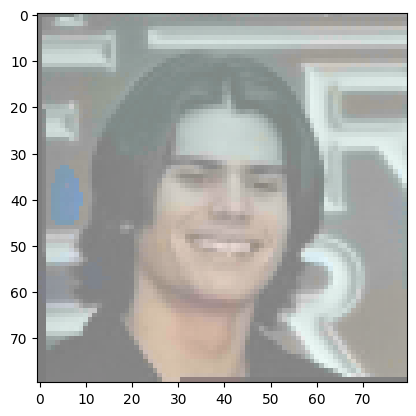

In [15]:
img_grid = torchvision.utils.make_grid(class_images_overfit)
print(img_grid.shape)
matplotlib_imshow(img_grid, one_channel=False)
# print(img_grid.shape)
# matplotlib_imsave(img_grid, 'class_images_overfit', '1', one_channel=False)

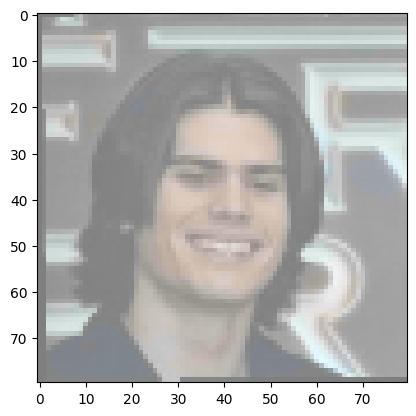

In [16]:
img_grid = torchvision.utils.make_grid(class_images)
matplotlib_imshow(img_grid, one_channel=False)

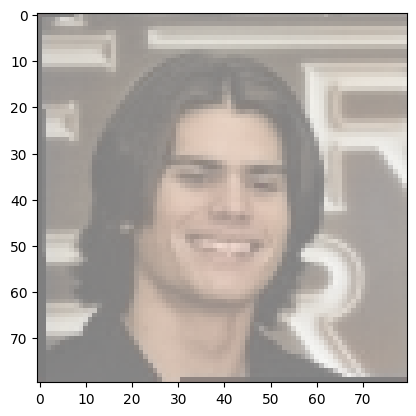

In [17]:
img_grid = torchvision.utils.make_grid(lab_images)
matplotlib_imshow(img_grid, one_channel=False)

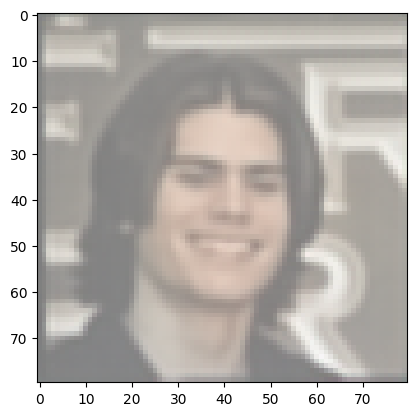

In [18]:
img_grid = torchvision.utils.make_grid(rgb_guess.cpu())
matplotlib_imshow(img_grid.detach(), one_channel=False)

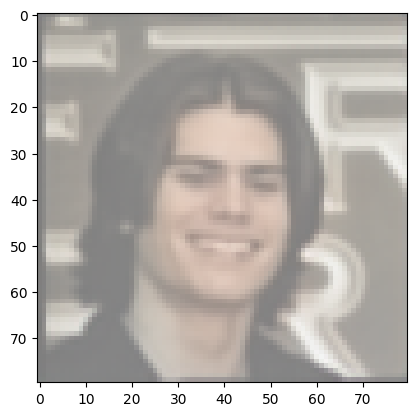

In [19]:
img_grid = torchvision.utils.make_grid(rgb_guess_adam.cpu())
matplotlib_imshow(img_grid.detach(), one_channel=False)

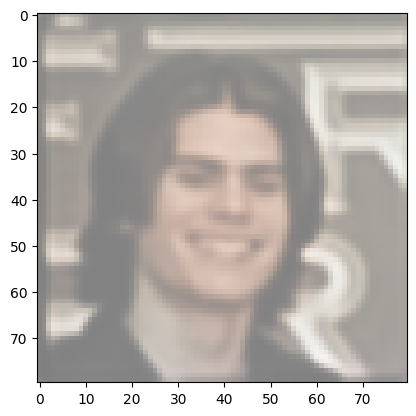

In [20]:
img_grid = torchvision.utils.make_grid(rgb_sigmoid_guess.cpu())
matplotlib_imshow(img_grid.detach(), one_channel=False)

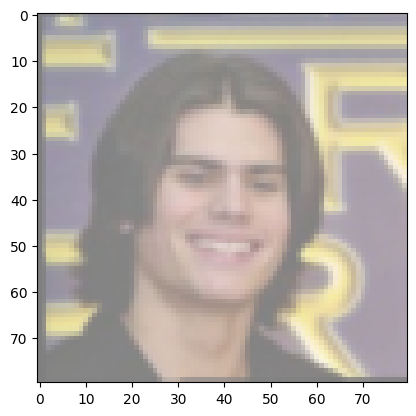

In [21]:
img_grid = torchvision.utils.make_grid(rgb_images)
matplotlib_imshow(img_grid.detach(), one_channel=False)

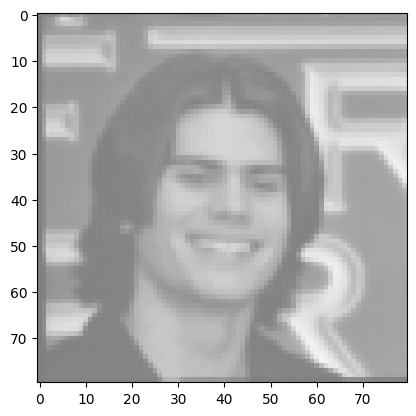

In [22]:
img_grid = torchvision.utils.make_grid(grey_images)
matplotlib_imshow(img_grid.detach(), one_channel=False)

In [23]:
# dataiter = iter(validation_loader)
rgb_images, labels = next(dataiter)
grey_images = transform_grey(rgb_images)

# dataiter2 = iter(validation_loader2)
images, labels = next(dataiter2)
l, _ = split_norm(images)

# dataiter3 = iter(validation_loader3)
images, labels = next(dataiter3)
l3, _ = split_norm2(images)


In [24]:




# for k in range(110):
#     rgb_images, labels = next(dataiter)
#     grey_images = transform_grey(rgb_images)
    
    
#     images, labels = next(dataiter2)
#     l, _ = split_norm(images)
#     l2, _ = split_norm2(images)
    
    
    
#     images, labels = next(dataiter3)
#     l3, _ = split_norm2(images)
    
    






# # NOTE: This UNet was more or less copied from 
# # https://towardsdatascience.com/cook-your-first-u-net-in-pytorch-b3297a844cf3
#     rgb_guess = model1(grey_images.cuda())
    
#     rgb_guess_adam = model2(grey_images.cuda())



   
#     rgb_sigmoid_guess = model3(grey_images.cuda())


    


#     ab = model4(l.cuda())
#     labs = merge_denorm(l.cuda(), ab)
#     labs = labs.cpu()
    
#     lab_images = []
#     for i in range(len(ab)):
#         # print(images[i].shape)
#         lab_images.append(rgb_transforms(labs[i].permute(1, 2, 0).detach().numpy()))


   



#     grey = l2
    
#     # model = torch.load("'modelclassify80.pt'")
#     # model.to(device)
#     # model.eval()
    
#     ab = model5(grey.cuda())
    
#     # # print(ab.shape)
#     ab = torch.argmax(ab, dim=1)
#     # # print(ab.shape)
#     # # print(grey.shape)
#     # # print(torch.mean(ab))
    
#     labs = merge_denorm2(grey.cuda(), ab)
#     # # print(torch.max(labs[:,(1,2)]))
#     labs = labs.cpu()
#     class_images = []
#     for i in range(len(ab)):
#         # print(images[i].shape)
#         class_images.append(rgb_transforms(labs[i].permute(1, 2, 0).detach().numpy()))


#     grey = l3
    
#     # model = torch.load("'modelclassify.pt'")
#     # model.to(device)
#     # model.eval()
    
#     ab = model6(grey.cuda())
    
#     # # print(ab.shape)
#     ab = torch.argmax(ab, dim=1)
#     # # print(ab.shape)
#     # # print(grey.shape)
    
#     labs = merge_denorm2(grey.cuda(), ab)
#     labs = labs.cpu()
#     class_images_overfit = []
#     for i in range(len(ab)):
#         # print(images[i].shape)
#         class_images_overfit.append(transform4(rgb_transforms(labs[i].permute(1, 2, 0).detach().numpy())))

#     img_grid = torchvision.utils.make_grid(class_images_overfit)
#     # print(str(i))
#     matplotlib_imsave(img_grid, 'class_images_overfit', str(k), one_channel=False)
#     matplotlib_imshow(img_grid, one_channel=False)

#     img_grid = torchvision.utils.make_grid(class_images)
#     # print(torch.min(img_grid))
#     matplotlib_imsave(img_grid, 'class_images', str(k), one_channel=False)

#     img_grid = torchvision.utils.make_grid(lab_images)
#     matplotlib_imsave(img_grid, 'lab_images', str(k), one_channel=False)

#     img_grid = torchvision.utils.make_grid(rgb_sigmoid_guess)
#     matplotlib_imsave(img_grid.cpu().detach(), 'rgb_sigmoid_guess', str(k), one_channel=False)

#     img_grid = torchvision.utils.make_grid(rgb_guess)
#     matplotlib_imsave(img_grid.cpu().detach(), 'rgb_guess', str(k), one_channel=False)

#     img_grid = torchvision.utils.make_grid(rgb_images)
#     matplotlib_imsave(img_grid.cpu().detach(), 'rgb_images', str(k), one_channel=False)

#     img_grid = torchvision.utils.make_grid(grey_images)
#     matplotlib_imsave(img_grid.cpu().detach(), 'grey_images', str(k), one_channel=False)

